In [1]:
#Multiple independent variables
#Multi-linear regression
#y=a0+a1*x1+a2*x2+a3*x3.....an*xn
#Goal is best fit plane, hyper-plane
#If two independent variables->plane
#If more than two independent variables->hyper plane
#Assumptions of multi linear regression:
#Linear relationship between dependent variables and independent variables
#independent variables are not too highly correlated with each other
#Correlation->0(less correlation)
#Correlation->+-1(high correlation)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
dataset=pd.read_csv('50_Startups.csv')
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [22]:
dataset.isnull().any().any()

False

In [23]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

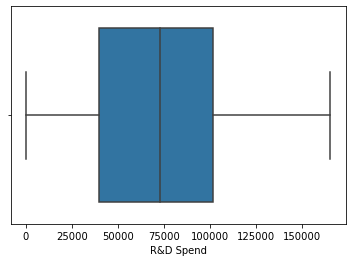

In [24]:
sns.boxplot(dataset['R&D Spend'])

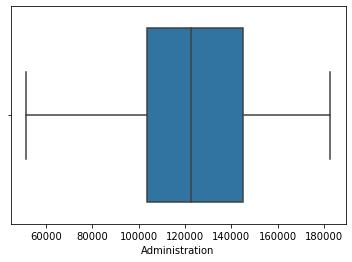

In [25]:
sns.boxplot(dataset['Administration'])

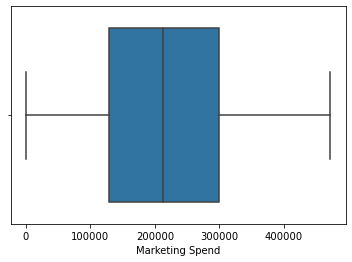

In [26]:
sns.boxplot(dataset['Marketing Spend'])

In [28]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

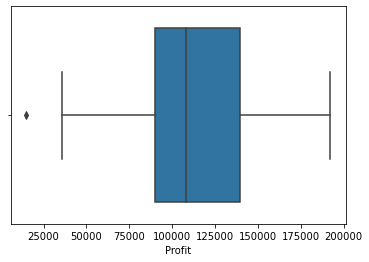

In [29]:
sns.boxplot(dataset['Profit'])

In [11]:
# if unknown is a category, it is not null value

In [30]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [31]:
dataset.drop(49,axis=0,inplace=True)

In [32]:
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


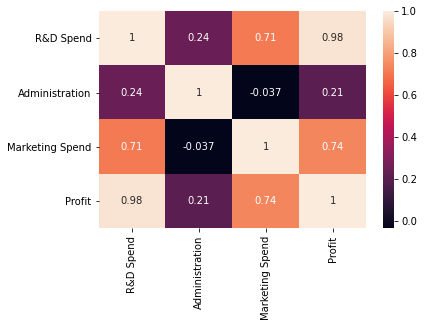

In [33]:
sns.heatmap(dataset.corr(),annot=True)

In [34]:
x=dataset.iloc[:,0:4].values
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [17]:
x_train

NameError: name 'x_train' is not defined

In [35]:
y=dataset.iloc[:,4:].values
y

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94],
       [156991.12],
       [156122.51],
       [155752.6 ],
       [152211.77],
       [149759.96],
       [146121.95],
       [144259.4 ],
       [141585.52],
       [134307.35],
       [132602.65],
       [129917.04],
       [126992.93],
       [125370.37],
       [124266.9 ],
       [122776.86],
       [118474.03],
       [111313.02],
       [110352.25],
       [108733.99],
       [108552.04],
       [107404.34],
       [105733.54],
       [105008.31],
       [103282.38],
       [101004.64],
       [ 99937.59],
       [ 97483.56],
       [ 97427.84],
       [ 96778.92],
       [ 96712.8 ],
       [ 96479.51],
       [ 90708.19],
       [ 89949.14],
       [ 81229.06],
       [ 81005.76],
       [ 78239.91],
       [ 77798.83],
       [ 71498.49],
       [ 69758.98],
       [ 65200.33],
       [ 64926.08],
       [ 49490.75],
       [ 42559.73],
       [ 35673.41]])

In [36]:
import sklearn 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [37]:
ct = ColumnTransformer([("on",OneHotEncoder(),[3])],remainder="passthrough")
x=ct.fit_transform(x)
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [64]:
import joblib
joblib.dump(ct,'transform')

['transform']

In [65]:
x=x[:,1:]
x

array([[1, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [1, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [1, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [1, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [1, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [1, 0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1, 1.0, 0.0, 9

In [66]:
x.shape

(49, 6)

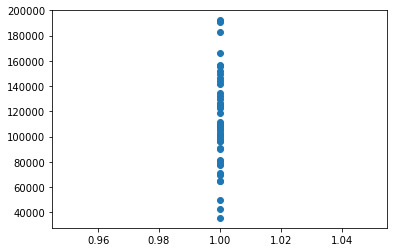

In [67]:
plt.scatter(x[:,0],y) # not linearly related

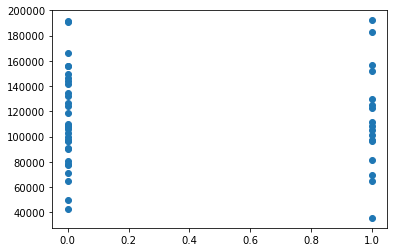

In [68]:
plt.scatter(x[:,2],y) #linearly related

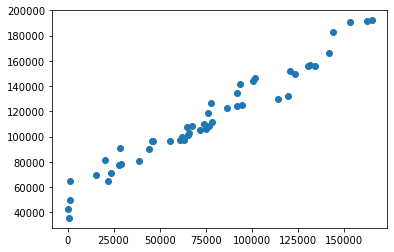

In [69]:
plt.scatter(x[:,3],y) #not linearly related

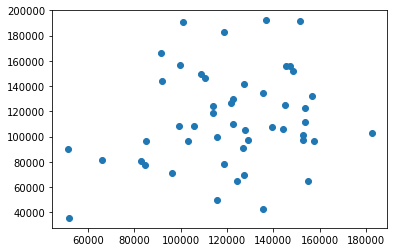

In [70]:
plt.scatter(x[:,4],y) # linearly related

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) #independent, dependent, test size and random state

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
mr=LinearRegression()
mr.fit(x_train,y_train)

LinearRegression()

In [74]:
joblib.dump(mr,"multi.save")

['multi.save']

In [47]:
y_pred=mr.predict(x_test)
y_pred

array([[102338.50361755],
       [171535.20160427],
       [111765.56407477],
       [101103.49659123],
       [101932.7155875 ],
       [ 92134.46149272],
       [ 91033.64285457],
       [ 77347.9894262 ],
       [159561.41083286],
       [136002.84128899]])

In [48]:
y_test

array([[101004.64],
       [166187.94],
       [105733.54],
       [ 99937.59],
       [ 97427.84],
       [ 89949.14],
       [ 96712.8 ],
       [ 78239.91],
       [155752.6 ],
       [146121.95]])

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9709286293284475

In [50]:
mr.predict([[0,1,116853.5,236524.0,266188]])

array([[143990.30420692]])

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
mse=mean_squared_error(y_test,y_pred)
mse

24313833.477630775

In [53]:
from math import sqrt
rmse=sqrt(mse)
rmse

4930.905948974364

In [54]:
x.shape

(49, 5)

In [56]:
x=np.append(arr=np.ones((49,1)).astype(int),values=x,axis=1)
x

array([[1, 1, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1, 1, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1, 1, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [1, 1, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1, 1, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [1, 1, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1, 1, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1, 1, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [1, 1, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1, 1, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1, 1, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1, 1, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1, 1, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1, 1, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1, 1, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [1, 1, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1, 1, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [1, 1, 0.0, 1.0, 9

In [57]:
x_opt=np.array(x[:,[0,1,2,3,4,5]],dtype=float)
x_opt

array([[1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.6534920e+05, 1.3689780e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.6259770e+05, 1.5137759e+05],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.5344151e+05, 1.0114555e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.4437241e+05, 1.1867185e+05],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.4210734e+05, 9.1391770e+04],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.3187690e+05, 9.9814710e+04],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.3461546e+05, 1.4719887e+05],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.3029813e+05, 1.4553006e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.2054252e+05, 1.4871895e+05],
       [1.0000000e+00, 1.0000000e+00,

In [58]:
import statsmodels.api as sm

In [59]:
regression_OLS=sm.OLS(endog=y,exog=x_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     256.8
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           6.99e-30
Time:                        15:58:34   Log-Likelihood:                -507.76
No. Observations:                  49   AIC:                             1026.
Df Residuals:                      44   BIC:                             1035.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.884e+04   2706.118     10.659      0.000    2.34e+04    3.43e+04
x1          2.884e+04   2706.118     10.659      0.000    2.34e+04    3.43e+04
x2          -723.3042   2874.409     -0.252      0.802   -6516.294    5069.686
x3         -1965.4645   2821.513     -0.697      0.490   -7651.850    3720.921
x4             0.8359      0.027     31.170      0.000       0.782       0.890
x5            -0.0466      0.042     -1.096      0.279      -0.132       0.039
==============================================================================
Omnibus:                        0.114   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.944   Jarque-Bera (JB):                0.091
Skew:                          -0.084   Prob(JB):                        0.955
Kurtosis:                       2.872   Cond. No.                     1.64e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.95e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [60]:
x_opt=np.array(x[:,[0,1,2,3,5]],dtype=float)
x_opt

array([[1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.3689780e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.5137759e+05],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.0114555e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.1867185e+05],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        9.1391770e+04],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        9.9814710e+04],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.4719887e+05],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.4553006e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.4871895e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0867917e+05],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.10

In [61]:
regression_OLS=sm.OLS(endog=y,exog=x_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.8197
Date:                Wed, 19 Aug 2020   Prob (F-statistic):              0.490
Time:                        15:58:37   Log-Likelihood:                -584.66
No. Observations:                  49   AIC:                             1177.
Df Residuals:                      45   BIC:                             1185.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.804e+04   1.28e+04      2.976      0.005    1.23e+04    6.38e+04
x1          3.804e+04   1.28e+04      2.976      0.005    1.23e+04    6.38e+04
x2          9074.9616   1.36e+04      0.669      0.507   -1.83e+04    3.64e+04
x3          4119.6383   1.34e+04      0.308      0.759   -2.28e+04    3.11e+04
x4             0.2762      0.196      1.410      0.165      -0.118       0.671
==============================================================================
Omnibus:                        1.204   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.548   Jarque-Bera (JB):                1.231
Skew:                           0.329   Prob(JB):                        0.540
Kurtosis:                       2.587   Cond. No.                     2.16e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
x_opt=np.array(x[:,[0,2,3,5]],dtype=float)
x_opt
regression_OLS=sm.OLS(endog=y,exog=x_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.8197
Date:                Wed, 19 Aug 2020   Prob (F-statistic):              0.490
Time:                        15:58:39   Log-Likelihood:                -584.66
No. Observations:                  49   AIC:                             1177.
Df Residuals:                      45   BIC:                             1185.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.607e+04   2.56e+04      2.976      0.005    2.46e+04    1.28e+05
x1          9074.9616   1.36e+04      0.669      0.507   -1.83e+04    3.64e+04
x2          4119.6383   1.34e+04      0.308      0.759   -2.28e+04    3.11e+04
x3             0.2762      0.196      1.410      0.165      -0.118       0.671
==============================================================================
Omnibus:                        1.204   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.548   Jarque-Bera (JB):                1.231
Skew:                           0.329   Prob(JB):                        0.540
Kurtosis:                       2.587   Cond. No.                     5.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
x_opt=np.array(x[:,[0,3,5]],dtype=float)
x_opt
regression_OLS=sm.OLS(endog=y,exog=x_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.018
Date:                Wed, 19 Aug 2020   Prob (F-statistic):              0.369
Time:                        15:58:41   Log-Likelihood:                -584.90
No. Observations:                  49   AIC:                             1176.
Df Residuals:                      46   BIC:                             1181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.043e+04   2.46e+04      3.274      0.002     3.1e+04     1.3e+05
x1          -418.0925   1.15e+04     -0.037      0.971   -2.35e+04    2.26e+04
x2             0.2776      0.195      1.427      0.160      -0.114       0.669
==============================================================================
Omnibus:                        1.014   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                1.048
Skew:                           0.311   Prob(JB):                        0.592
Kurtosis:                       2.643   Cond. No.                     5.64e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""